In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" #for GPU usage

In [2]:
##############
# 0 smooth : 8437
# 1 1betwe:8069
# 2 cigar:579
# 3 edge: 3903
# 4 spiral:7806

In [3]:
#smooth + spiral     outlier:edge-on

import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator # inport api
datagen = ImageDataGenerator(zca_whitening=True)


data_dir = "/home/images_training_rev1/"
label_dir = "/home/5-class-inorder.csv"

label=pd.read_csv(label_dir)
# label = xls_file.parse('edge-on_smooth')
index1=label['GalaxyID']
# print(index1)
# print(len(index1))

label_list=label['class']
label_list=list(label_list)
image_list=[]

for i in range(len(index1)):
    image_list.append(data_dir+str(index1[i])+'.jpg')
print("image_list长度：%d"%len(image_list))

temp = np.array([image_list, label_list])
temp = temp.transpose()
# print(temp)
# np.random.shuffle(temp)
    
image_list = list(temp[:, 0])
label_list = list(temp[:, 1])
label_list = [round(float(i)) for i in label_list] 

image_c, image_id, label_trans = [],[],[]
idd = 0

oddglaxy = 0
for i in range(len(image_list)):
    if label_list[i] == 0:
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
#         label_trans.append(label_list[i])
        label_trans.append(0)
        
    if label_list[i] == 4:
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
#         label_trans.append(label_list[i])
        label_trans.append(0)
        
        
    if label_list[i] == 3 and oddglaxy <=2000:
        oddglaxy += 1
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
        label_trans.append(1)
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_90)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_180)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_270)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        

dictory = dict(zip(image_id, label_trans))     
image_c = np.array(image_c)
image_c = image_c/255
image_c = image_c.reshape(len(label_trans),64,64,3)
    
# for i in image_list[:]:
#     image = Image.open(i)
#     image = image.convert('L')
    
#     img_width=random.randint(170,241)
#     CenterCrop = transforms.CenterCrop((img_width,img_width))
#     image = CenterCrop(image)
    
#     image = image.resize((80,80))
#     image = image.resize((64,64))
    
#     im = np.array(image)
#     image_c.append(im)
    
    
# image_c = np.array(image_c)
# image_c = image_c/255
# image_c = image_c.reshape(len(la),64,64,1)   
# datagen.fit(image_c)            
print(np.array(image_c).shape)

Using TensorFlow backend.
/home/zouzq/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


image_list长度：28793
(18243, 64, 64, 3)


In [116]:
#smooth     outlier:spiral

import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator # inport api
datagen = ImageDataGenerator(zca_whitening=True)


data_dir = "/home/images_training_rev1/"
label_dir = "/home/5-class-inorder.csv"

label=pd.read_csv(label_dir)
# label = xls_file.parse('edge-on_smooth')
index1=label['GalaxyID']
# print(index1)
# print(len(index1))

label_list=label['class']
label_list=list(label_list)
image_list=[]

for i in range(len(index1)):
    image_list.append(data_dir+str(index1[i])+'.jpg')
print("image_list长度：%d"%len(image_list))

temp = np.array([image_list, label_list])
temp = temp.transpose()
# print(temp)
# np.random.shuffle(temp)
    
image_list = list(temp[:, 0])
label_list = list(temp[:, 1])
label_list = [round(float(i)) for i in label_list] 

image_c, image_id, label_trans = [],[],[]
idd = 0

oddglaxy = 0
for i in range(len(image_list)):
    if label_list[i] == 0:
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
#         label_trans.append(label_list[i])
        label_trans.append(0)
        
#     if label_list[i] == 4:
#         image = Image.open(image_list[i])
# #         image = image.convert('L')
#         img_width = random.randint(170,240)
#         CenterCrop = transforms.CenterCrop((img_width,img_width))
#         image = CenterCrop(image)
#         image = image.resize((80,80))
#         image = image.resize((64,64))
# #         image = np.array(image)
        
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
# #         label_trans.append(label_list[i])
#         label_trans.append(0)
        
        
    if label_list[i] == 4 and oddglaxy <=1000:
        oddglaxy += 1
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
        label_trans.append(1)
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_90)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_180)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_270)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        

dictory = dict(zip(image_id, label_trans))     
image_c = np.array(image_c)
image_c = image_c/255
image_c = image_c.reshape(len(label_trans),64,64,3)
    
# for i in image_list[:]:
#     image = Image.open(i)
#     image = image.convert('L')
    
#     img_width=random.randint(170,241)
#     CenterCrop = transforms.CenterCrop((img_width,img_width))
#     image = CenterCrop(image)
    
#     image = image.resize((80,80))
#     image = image.resize((64,64))
    
#     im = np.array(image)
#     image_c.append(im)
    
    
# image_c = np.array(image_c)
# image_c = image_c/255
# image_c = image_c.reshape(len(la),64,64,1)   
# datagen.fit(image_c)            
print(np.array(image_c).shape)

/home/zouzq/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


image_list长度：28793
(9437, 64, 64, 3)


In [2]:
#edge     outlier:cigar

import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator # inport api
datagen = ImageDataGenerator(zca_whitening=True)


data_dir = "/home/images_training_rev1/"
label_dir = "/home/5-class-inorder.csv"

label=pd.read_csv(label_dir)
# label = xls_file.parse('edge-on_smooth')
index1=label['GalaxyID']
# print(index1)
# print(len(index1))

label_list=label['class']
label_list=list(label_list)
image_list=[]

for i in range(len(index1)):
    image_list.append(data_dir+str(index1[i])+'.jpg')
print("image_list长度：%d"%len(image_list))

temp = np.array([image_list, label_list])
temp = temp.transpose()
# print(temp)
# np.random.shuffle(temp)
    
image_list = list(temp[:, 0])
label_list = list(temp[:, 1])
label_list = [round(float(i)) for i in label_list] 

image_c, image_id, label_trans = [],[],[]
idd = 0

oddglaxy = 0
inliergalaxy = 0
for i in range(len(image_list)):
    if label_list[i] == 3 and inliergalaxy <=9000:
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
#         label_trans.append(label_list[i])
        label_trans.append(0)
        inliergalaxy += 1
    
        image = image.transpose(Image.ROTATE_90)
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
        label_trans.append(0)
        inliergalaxy += 1
        
        image = image.transpose(Image.ROTATE_180)
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
        label_trans.append(0)
        inliergalaxy += 1
        
#     if label_list[i] == 4:
#         image = Image.open(image_list[i])
# #         image = image.convert('L')
#         img_width = random.randint(170,240)
#         CenterCrop = transforms.CenterCrop((img_width,img_width))
#         image = CenterCrop(image)
#         image = image.resize((80,80))
#         image = image.resize((64,64))
# #         image = np.array(image)
        
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
# #         label_trans.append(label_list[i])
#         label_trans.append(0)
        
        
    if label_list[i] == 2 and oddglaxy <=1000:
        oddglaxy += 1
        image = Image.open(image_list[i])
#         image = image.convert('L')
        img_width = random.randint(170,240)
        CenterCrop = transforms.CenterCrop((img_width,img_width))
        image = CenterCrop(image)
        image = image.resize((80,80))
        image = image.resize((64,64))
#         image = np.array(image)
        
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
        label_trans.append(1)
#         label_trans.append(label_list[i])
        
#         image = image.transpose(Image.ROTATE_90)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        
        image = image.transpose(Image.ROTATE_180)
        image_c.append(np.array(image))
        image_id.append(idd)
        idd += 1
        label_trans.append(1)
        
#         image = image.transpose(Image.ROTATE_270)
#         image_c.append(np.array(image))
#         image_id.append(idd)
#         idd += 1
#         label_trans.append(label_list[i])
        

dictory = dict(zip(image_id, label_trans))     
image_c = np.array(image_c)
image_c = image_c/255
image_c = image_c.reshape(len(label_trans),64,64,3)
    
# for i in image_list[:]:
#     image = Image.open(i)
#     image = image.convert('L')
    
#     img_width=random.randint(170,241)
#     CenterCrop = transforms.CenterCrop((img_width,img_width))
#     image = CenterCrop(image)
    
#     image = image.resize((80,80))
#     image = image.resize((64,64))
    
#     im = np.array(image)
#     image_c.append(im)
    
    
# image_c = np.array(image_c)
# image_c = image_c/255
# image_c = image_c.reshape(len(la),64,64,1)   
# datagen.fit(image_c)            
print(np.array(image_c).shape)

Using TensorFlow backend.
/home/zouzq/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


image_list长度：28793
(10161, 64, 64, 3)


In [13]:
state = np.random.get_state()
np.random.shuffle(image_c)
np.random.set_state(state)
np.random.shuffle(label_trans)

In [4]:
#====================================================================#
# Extract the representative features by a Convolutional AutoEncoder #
#====================================================================#

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for GPU usage
#import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
from keras import callbacks, optimizers

from matplotlib import pyplot as plt
from astropy.io import fits
from skimage import exposure
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, GlobalAveragePooling2D, multiply
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda


#------------------------------------------------------------------------#
#彩色图CAE
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, GlobalAveragePooling2D, multiply
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda


#------------------------------------------------------------------------#
import time
Tstart = time.time() #Timer start


def getdate():
    import datetime
    import time
    year=str(datetime.datetime.now().year)
    month=str(datetime.datetime.now().month)
    day=str(datetime.datetime.now().day)
    time=str(time.time())
    #print(year+'-'+month+'-'+day+'-'+time)
    return(year+'-'+month+'-'+day+'-'+time)
## MODEL PRE-SETTING ##


def cae(embedding_fea):
    input_img = Input(shape=(64, 64, 3))  # adapt this if using `channels_first` image data format

    x = Conv2D(128, (4, 4), activation='relu', padding='same')(input_img) #(64,64,128)
    x = cbam(x)
    x = MaxPooling2D((2, 2), padding='same')(x) #(32, 32, 128)
    x = Conv2D(64, (4, 4), activation='relu', padding='same')(x) #(32, 32, 64)
    x = cbam(x)
    x = MaxPooling2D((2, 2), padding='same')(x) #(16, 16, 64)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #(16, 16, 32)
    x = cbam(x)
    x = MaxPooling2D((2, 2), padding='same')(x) #(8, 8, 32)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x) #(8, 8, 16)
    x = cbam(x)
    x = MaxPooling2D((2, 2), padding='same')(x) #(4, 4, 16)
    x = Conv2D(8, (2, 2), activation='relu', padding='same')(x) #(4, 4, 8)
#     x = cbam(x)

    x = Flatten()(x)
    x = Dense(units=64, activation='relu')(x)
    x = Dense(units=32, activation='relu')(x)
#     x = Dense(units=16, activation='relu')(x)
    encoded = Dense(units=embedding_fea, activation='relu', name='embedding')(x)
#     x = Dense(units=16, activation='relu')(encoded)
    x = Dense(units=32, activation='relu')(encoded)
    x = Dense(units=64, activation='relu')(x)
    x = Dense(units=128, activation='relu')(x)
    x = Reshape((4, 4, 8))(x)

    x = Conv2D(8, (2, 2), activation='relu', padding='same')(x) #(4, 4, 8)
    x = UpSampling2D((2, 2))(x) #(8, 8, 8)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x) #(8, 8, 16)
    x = UpSampling2D((2, 2))(x) #(16, 16, 16)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #(16, 16, 32)
    x = UpSampling2D((2, 2))(x) #(32, 32, 32)
    x = Conv2D(64, (4, 4), activation='relu',padding = 'same')(x) #(30, 30, 64)
    x = UpSampling2D((2, 2))(x) #(64, 64, 64)
    decoded = Conv2D(3, (4, 4), activation='sigmoid',padding = 'same')(x) #(64, 64, 128)
    
    
    
     

    autoencoder = Model(input_img, decoded)
    optimizer_adam = optimizers.Adam(lr=0.001)
    autoencoder.compile(optimizer=optimizer_adam, loss='binary_crossentropy')

    print(autoencoder.summary())
    return autoencoder


def cbam(cbam_feature, ratio=8):

    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):

    #channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    #channel = input_feature._keras_shape[-1]
    channel = input_feature.shape.as_list()[-1]

    shared_layer_one = Dense(channel//ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
    shared_layer_two = Dense(channel, kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')

    avg_pool = GlobalAveragePooling2D()(input_feature)    
    avg_pool = Reshape((1,1,channel))(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)

    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)

    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)

    '''
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    '''

    return Multiply()([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    '''
    if K.image_data_format() == "channels_first":
        channel = input_feature._keras_shape[1]
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = input_feature._keras_shape[-1]
        cbam_feature = input_feature
    '''
    #channel = input_feature._keras_shape[-1]
    channel = input_feature.shape.as_list()[-1]
    cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat._keras_shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,kernel_size=kernel_size,strides=1,padding='same',activation='sigmoid',kernel_initializer='he_normal',use_bias=False)(concat)	
    assert cbam_feature._keras_shape[-1] == 1

    '''
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    '''

    return multiply([input_feature, cbam_feature])


def savemodel(savename):
    autoencoder.save(savename + getdate() + '.h5')
    print('Savemodel Done!')

def plot_reconstruction():
    decoded_imgs = autoencoder.predict(image_c) 
    n = 6
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(image_c[i].reshape(64, 64))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction|
        ax = plt.subplot(2, n, i+1 + n)
        plt.imshow(decoded_imgs[i].reshape(64, 64))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.savefig(savename + '.png')
    plt.show()


if __name__ == "__main__":
############################################### 
# preprocess parameter
###############################################
  
    samnum = None

    Time1 = time.time()
    #X_train = dataprocess(datapath, samnum)
    Time2=time.time()
    print('\n', 'DATA PROCESS TIME:', Time2-Time1)

###########################################
#  model parameter
###########################################
    batchsize = 128
    Epochs = [30, 50,70]
    Embedding_fea = [28,24,20,16]
    embedding_floor = 69

    Time3 = time.time()
    for embedding_fea in Embedding_fea:
        autoencoder = cae(embedding_fea)
        print(embedding_fea)
        Epochtmp = 0
        for epoch in Epochs:
            Epochtmp+=epoch
            autoencoder.fit(image_c, image_c, batch_size=batchsize, epochs=epoch, shuffle=True)
            Time4 = time.time()
            print('\n', 'CAE TRAIN TIME:', Time4-Time3)
            savename = 'CAE_cabm_cigar&edge_RGB_for-PYOD_%depoch%dfea%dF'%(Epochtmp, embedding_fea, embedding_floor)
            savemodel(savename)
#             plot_reconstruction()
            print('\n', 'TOTAL TIME:', Time4-Time1)


 DATA PROCESS TIME: 7.152557373046875e-07
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 128)  6272        input_1[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 128)          0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 128)          0


Epoch 1/30
10161/10161 [==============================] - 36s 4ms/step - loss: 0.3362
Epoch 2/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2090
Epoch 3/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1985
Epoch 4/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1967
Epoch 5/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1956
Epoch 6/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1951
Epoch 7/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1948
Epoch 8/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1946
Epoch 9/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1944
Epoch 10/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1942
Epoch 11/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1940
Epoch 12/30
10161/10161 [==========================

10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 12/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1912
Epoch 13/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 14/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 15/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 16/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 17/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1910
Epoch 18/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1910
Epoch 19/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 20/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 21/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1910
Epoch 22/70
10161/10161 [==============================

Epoch 1/30
10161/10161 [==============================] - 34s 3ms/step - loss: 0.3207
Epoch 2/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2144
Epoch 3/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2033
Epoch 4/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1978
Epoch 5/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1965
Epoch 6/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1955
Epoch 7/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1948
Epoch 8/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1944
Epoch 9/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1942
Epoch 10/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1939
Epoch 11/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1938
Epoch 12/30
10161/10161 [===========================

10161/10161 [==============================] - 32s 3ms/step - loss: 0.1912
Epoch 14/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1912
Epoch 15/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1912
Epoch 16/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 17/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1912
Epoch 18/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 19/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 20/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 21/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1912
Epoch 22/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 23/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1911
Epoch 24/70
10161/10161 [==============================

Epoch 1/30
10161/10161 [==============================] - 34s 3ms/step - loss: 0.3143
Epoch 2/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2202
Epoch 3/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2125
Epoch 4/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2021
Epoch 5/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1984
Epoch 6/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1972
Epoch 7/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1962
Epoch 8/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1955
Epoch 9/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1951
Epoch 10/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1947
Epoch 11/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1944
Epoch 12/30
10161/10161 [===========================

10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 14/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1915
Epoch 15/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 16/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 17/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1915
Epoch 18/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 19/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 20/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 21/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 22/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 23/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1913
Epoch 24/70
10161/10161 [==============================

Epoch 1/30
10161/10161 [==============================] - 34s 3ms/step - loss: 0.3274
Epoch 2/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.2059
Epoch 3/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1979
Epoch 4/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1961
Epoch 5/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1954
Epoch 6/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1950
Epoch 7/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1945
Epoch 8/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1943
Epoch 9/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1941
Epoch 10/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1939
Epoch 11/30
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1938
Epoch 12/30
10161/10161 [===========================

10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 14/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 15/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 16/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 17/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1913
Epoch 18/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1913
Epoch 19/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 20/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1913
Epoch 21/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1913
Epoch 22/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1913
Epoch 23/70
10161/10161 [==============================] - 32s 3ms/step - loss: 0.1914
Epoch 24/70
10161/10161 [==============================

In [16]:
# label4odd = []
# for i in label_trans:
#     if i == 1 or i == 0:
#         label4odd.append(0)
#     elif i == -1:
#         label4odd.append(1)
print('start')
from keras import backend as K
from keras.models import load_model
from sklearn.mixture import BayesianGaussianMixture as BGM
from sklearn.mixture import GaussianMixture as GM
# cae_mfn = '../CAE_cabm_smooth&edge-on_RGB_forZOO_150epoch24fea69F2021-1-28-1611838239.9864714.h5'
# cae_mfn = "../_cbam_smooth&spiral_150epoch24fea65F2021-1-8-1610081413.4085999.h5"
# cae_mfn = 'CAE_cabm_smooth-spiral&edge-on_RGB_for-PYOD_150epoch28fea69F2021-3-23-1616519621.8832817.h5'
# cae_mfn = 'CAE_cabm_smooth-spiral&edge-on_RGB_for-PYOD_30epoch16fea69F2021-3-23-1616538656.3713565.h5'
# cae_mfn = '../_cbam_smooth&spiral_150epoch16fea65F2021-1-7-1610001654.7808537.h5'
cae_mfn = 'CAE_cabm_cigar&edge_RGB_for-PYOD_30epoch16fea69F2021-3-25-1616699627.3773034.h5'

cae_model = load_model(cae_mfn)
Embedding_layer = K.function([cae_model.layers[0].input], [cae_model.layers[69].output])
input4bgmm = Embedding_layer([image_c[:20000]])
input4bgmm = np.array(input4bgmm)
input4bgmm = input4bgmm[0]
print(input4bgmm.shape)

start
(10161, 16)


In [50]:
from pyod.models.knn import KNN
X_train = image_c[:10000]
X_test = image_c[10000:18000]
X_train = X_train.reshape(10000,64*64*3)
X_test = X_test.reshape(8000,64*64*3)
clf_name = 'kNN'
clf = KNN(contamination=0.1, n_neighbors=8, method='largest', radius=1.0, algorithm='auto', leaf_size=30, 
          metric='minkowski', p=2, metric_params=None, n_jobs=1) # 初始化检测器clf
clf.fit(X_train) # 使用X_train训练检测器clf


# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
y_test_scores = clf.decision_function(X_test)  #  返回未知数据上的异常值 (分值越大越异常)
print("++++++++++++++++++++")

/home/zouzq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/home/zouzq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


++++++++++++++++++++


In [17]:
from pyod.models.knn import KNN
# X_train = input4bgmm[:10000]
# X_test = input4bgmm[10000:18000]
# X_train = X_train.reshape(10000,16)
# X_test = X_test.reshape(8000,16)

X_train = input4bgmm
X_test = input4bgmm
X_train = X_train.reshape(-1,16)
X_test = X_test.reshape(-1,16)

clf_name = 'kNN'
clf = KNN(contamination=0.1, n_neighbors=10, method='largest', radius=1.0, algorithm='auto', leaf_size=30, 
          metric='minkowski', p=2, metric_params=None, n_jobs=1) # 初始化检测器clf
clf.fit(X_train) # 使用X_train训练检测器clf


# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
y_test_scores = clf.decision_function(X_test)  #  返回未知数据上的异常值 (分值越大越异常)
print("++++++++++++++++++++")

/home/zouzq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/home/zouzq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


++++++++++++++++++++


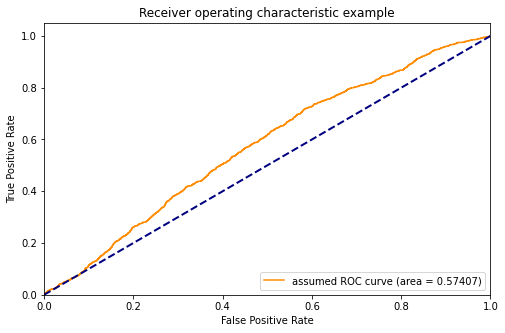

In [18]:
# label44odd = label_trans[10000:18000]
label44odd = label_trans

maxscore, minscore = max(y_test_scores), min(y_test_scores)
for i,score in enumerate(y_test_scores):
    y_test_scores[i] = score/maxscore
# print(y_test_scores)
# print(label44odd)
# label44odd = np.array(label44odd)
def PlotAuc(y_scores,label44odd):
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.metrics import roc_curve, auc  ###计算roc和auc

    # Compute ROC curve and ROC area for each class
    fpr, tpr, threshold = roc_curve(label44odd, y_scores)  ###计算真正率和假正率
    roc_auc = auc(fpr, tpr)
    
    lw = 2
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange',label='assumed ROC curve (area = %0.5f)' % roc_auc)
    #plt.plot(lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线

#     plt.plot(fpr_ptrue, tpr_ptrue, color='red',label='truefraction ROC curve (area = %0.5f)' % roc_auc_ptrue)
    #plt.plot(lw=lw,label='ROC curve (area = %0.5f)' % roc_auc_ptrue)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
PlotAuc(y_test_scores,label44odd)

In [11]:
print(y_test_scores)
print(y_test_pred)

[0.17234069 0.15383074 0.23698043 ... 0.12961427 0.1452751  0.18220647]
[0 0 0 ... 0 0 0]


In [22]:
print(sum(y_test_pred))

443


In [31]:

train = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
label = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
state = np.random.get_state()
np.random.shuffle(train)
np.random.set_state(state)
np.random.shuffle(label)

print(train ,label)

[3, 3, 7, 1, 5, 5, 8, 4, 2, 8, 6, 2, 9, 7, 1, 6, 4] [3, 3, 7, 1, 5, 5, 8, 4, 2, 8, 6, 2, 9, 7, 1, 6, 4]


[9, 7, 2, 5, 6, 5, 3, 4, 8, 2, 8, 3, 4, 1, 6, 7, 1]

[9, 7, 2, 5, 6, 5, 3, 4, 8, 2, 8, 3, 4, 1, 6, 7, 1]